In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temp= pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [4]:
temp.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [5]:
temp.shape

(577462, 4)

In [6]:
temp.isnull().sum()


dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [7]:
# get date in years

def get_year(date):
    return date.split('-')[0]
    
temp['year']=temp['dt'].apply(get_year)



In [8]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384,2.294,Åland,1743
1,1743-12-01,NaN,NaN,Åland,1743
2,1744-01-01,NaN,NaN,Åland,1744
3,1744-02-01,NaN,NaN,Åland,1744
4,1744-03-01,NaN,NaN,Åland,1744


In [9]:
# get the average temperature in each year across countries
data_temp=temp.groupby(['year','Country']).agg({'AverageTemperature' :'mean','AverageTemperatureUncertainty':'mean'}).reset_index()

In [10]:
data_temp.head()

,year,Country,AverageTemperature,AverageTemperatureUncertainty
0,1743,Albania,8.620,2.268
1,1743,Andorra,7.556,2.188
2,1743,Austria,2.482,2.116
3,1743,Belarus,0.767,2.465
4,1743,Belgium,7.106,1.855


In [11]:
# data_temp['MaxAverageTemperature']= data_temp['AverageTemperature'] + data_temp['AverageTemperatureUncertainty']
# data_temp['MinAverageTemperature']= data_temp['AverageTemperature'] - data_temp['AverageTemperatureUncertainty']
data_temp.drop('AverageTemperatureUncertainty',axis=1, inplace=True)

In [12]:
data_temp.head()

,year,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [13]:
data_temp.isnull().sum()


year                     0
Country                  0
AverageTemperature    2328
dtype: int64

In [53]:
# A function to get a graphic pattern of land temperature across years in any country
from matplotlib.pyplot import figure
    
import matplotlib.ticker as plticker
import seaborn as sns

def graph(data_temp,country):
   

    df=data_temp[data_temp.Country==country]
    x=df.year
    y=df.AverageTemperature
    
    ax = sns.lineplot(x,y)
    ax.xaxis.set_major_locator(plticker.MultipleLocator(10))
    plt.xticks(rotation=90)
    plot=sns.set(rc={'figure.figsize':(15,10)})
   
    return plot




C:\Users\olanr\.conda\envs\envsle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


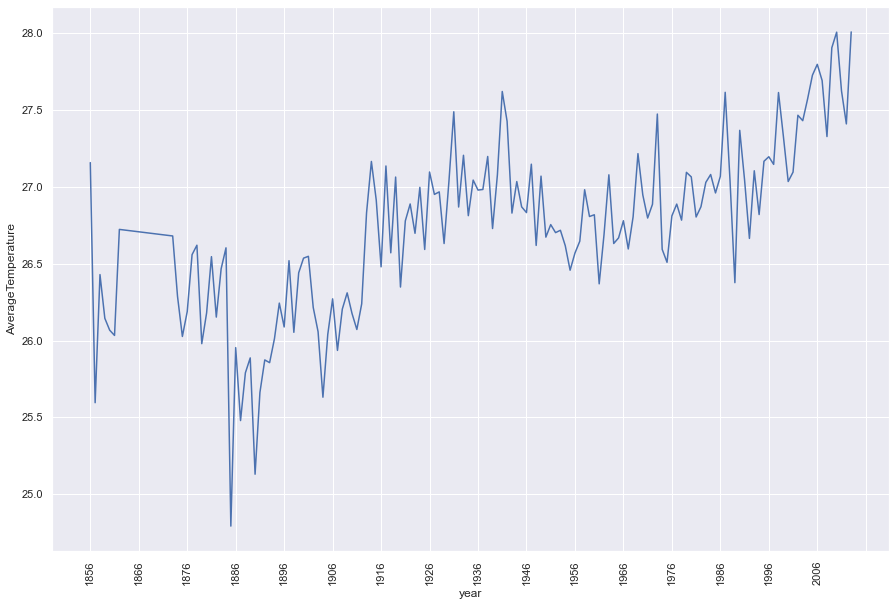

In [54]:
graph(data_temp,'Nigeria')

C:\Users\olanr\.conda\envs\envsle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


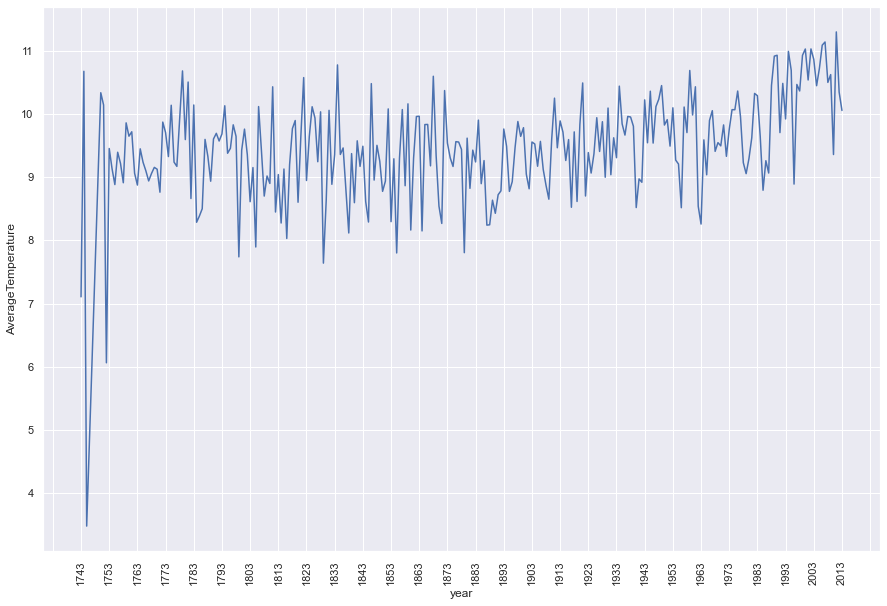

In [55]:
graph(data_temp,'Belgium')

In [17]:
data_temp['year'].unique()

array(['1743', '1744', '1745', '1746', '1747', '1748', '1749', '1750',
       '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758',
       '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766',
       '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774',
       '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782',
       '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790',
       '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798',
       '1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814',
       '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822',
       '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830',
       '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838',
       '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846',
       '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854',
      

Preprocessing of weater data for Correlation with Global food Prices.
Weather Data is Recorded from 1743- 2013, removing unneeded records.

In [18]:
land_temp=data_temp[data_temp['year'].isin(['1743', '1744', '1745', '1746', '1747', '1748', '1749', '1750',
       '1751', '1752', '1753', '1754', '1755', '1756', '1757', '1758',
       '1759', '1760', '1761', '1762', '1763', '1764', '1765', '1766',
       '1767', '1768', '1769', '1770', '1771', '1772', '1773', '1774',
       '1775', '1776', '1777', '1778', '1779', '1780', '1781', '1782',
       '1783', '1784', '1785', '1786', '1787', '1788', '1789', '1790',
       '1791', '1792', '1793', '1794', '1795', '1796', '1797', '1798',
       '1799', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808', '1809', '1810', '1811', '1812', '1813', '1814',
       '1815', '1816', '1817', '1818', '1819', '1820', '1821', '1822',
       '1823', '1824', '1825', '1826', '1827', '1828', '1829', '1830',
       '1831', '1832', '1833', '1834', '1835', '1836', '1837', '1838',
       '1839', '1840', '1841', '1842', '1843', '1844', '1845', '1846',
       '1847', '1848', '1849', '1850', '1851', '1852', '1853', '1854',
       '1855', '1856', '1857', '1858', '1859', '1860', '1861', '1862',
       '1863', '1864', '1865', '1866', '1867', '1868', '1869', '1870',
       '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878',
       '1879', '1880', '1881', '1882', '1883', '1884', '1885', '1886',
       '1887', '1888', '1889', '1890', '1891', '1892', '1893', '1894',
       '1895', '1896', '1897', '1898', '1899', '1900', '1901', '1902',
       '1903', '1904', '1905', '1906', '1907', '1908', '1909', '1910',
       '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918',
       '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926',
       '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934',
       '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942',
       '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950',
       '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958',
       '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998','1999']) == False]

In [19]:
land_temp

,year,Country,AverageTemperature
44841,2000,Afghanistan,15.497833
44842,2000,Africa,24.588083
44843,2000,Albania,13.746583
44844,2000,Algeria,24.032250
44845,2000,American Samoa,27.219833
...,...,...,...
48238,2013,Western Sahara,23.744250
48239,2013,Yemen,28.129750
48240,2013,Zambia,21.196000
48241,2013,Zimbabwe,20.710750


In [20]:
land_temp['year']=land_temp['year'].astype(int)

<ipython-input-20-aeb5794380bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_temp['year']=land_temp['year'].astype(int)


In [21]:
land_temp.dtypes

year                    int32
Country                object
AverageTemperature    float64
dtype: object

In [22]:


# x=df.year
# y=df.AverageTemperature
# fig, ax = plt.subplots(1,1)
# ax.plot(x,y)
# loc = plticker.MultipleLocator(base=10)
# ax.xaxis.set_major_locator(loc)
# fig.set_size_inches(30, 20)
# plt.show()


In [23]:

food_prices= pd.read_csv('wfpvam_foodprices.csv')

In [24]:
food_prices.head()

,date,country,city,market,currency,type,unit,mp_month,mp_year,mp_price,product
0,2000-01-01,Bassas da India,North/Amajyaruguru,Bhopal,INR,Retail,KG,1,2000,7.500,Wheat
1,2000-01-01,Mozambique,North/Amajyaruguru,AngÃ³nia,MZN,Retail,KG,1,2000,9.220,Rice
2,2000-01-01,Ethiopia,Addis Ababa,Addis Ababa,ETB,Wholesale,100 KG,1,2000,187.250,Sorghum (white)
3,2000-01-01,South Africa,Gauteng,Randfontein,ZAR,Wholesale,KG,1,2000,0.649,Wheat
4,2000-01-01,Bassas da India,North/Amajyaruguru,Bhubaneshwar,INR,Retail,KG,1,2000,16.500,Sugar


In [25]:
food_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853855 entries, 0 to 1853854
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   country   object 
 2   city      object 
 3   market    object 
 4   currency  object 
 5   type      object 
 6   unit      object 
 7   mp_month  int64  
 8   mp_year   int64  
 9   mp_price  float64
 10  product   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 155.6+ MB


In [26]:
food_prices['country'].unique()

array(['Bassas da India', 'Mozambique', 'Ethiopia', 'South Africa',
       'Afghanistan', 'Burkina Faso', 'Mexico', 'Senegal', 'Niger',
       'Philippines', 'Somalia', 'Guatemala', 'Thailand', 'Peru',
       'Colombia', 'Rwanda', 'Nicaragua', 'Bangladesh', 'Sudan', 'Togo',
       'Nepal', 'Tajikistan', 'Nigeria', 'Benin', 'Zambia', 'Mali',
       'Burundi', 'Cambodia', 'Malawi', 'Chad', 'Mauritania', 'Sri Lanka',
       'Madagascar', 'Pakistan', 'Central African Republic', 'Swaziland',
       'Kyrgyzstan', 'El Salvador', 'Ecuador', 'Argentina', 'Haiti',
       'Cameroon', 'Djibouti', "Cote d'Ivoire", 'Kazakhstan', 'Gambia',
       'Panama', 'United Republic of Tanzania', 'Ghana', 'Kenya',
       'Dominican Republic', 'Uganda', 'South Sudan',
       "Lao People's Democratic Republic", 'Cape Verde', 'Bhutan',
       'Liberia', 'State of Palestine', 'Azerbaijan', 'Gabon',
       'Democratic Republic of the Congo', 'Indonesia', 'Mongolia',
       'Honduras', 'Georgia', 'Eritrea', 'Guinea-

In [27]:
food_prices.rename(columns={'country': 'Country','mp_year':'year'}, inplace=True)
          


In [28]:
food_prices['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [29]:
# droping year entries to match the entries available in weather data
food_df=food_prices[food_prices['year'].isin([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])==False]


In [30]:
#get the average price of food in each country over years. This is prefered to preserve diff currencies.
prices=food_df.groupby(['Country','year']).agg({'mp_price' :'mean'}).reset_index()

In [31]:
prices

,Country,year,mp_price
0,Afghanistan,2000,265032.665746
1,Afghanistan,2001,612426.448917
2,Afghanistan,2002,742614.921542
3,Afghanistan,2003,9.517455
4,Afghanistan,2004,11.472213
...,...,...,...
792,Zambia,2013,6.086773
793,Zimbabwe,2010,0.271136
794,Zimbabwe,2011,0.322988
795,Zimbabwe,2012,0.339846


In [32]:
# Merging weather and food prices data.Some data with dissimilar countries  dropped
corr_table = pd.merge(land_temp,prices, how="inner", on=["year", "Country"])

In [33]:
corr_table

,year,Country,AverageTemperature,mp_price
0,2000,Afghanistan,15.497833,265032.665746
1,2000,Bangladesh,25.150167,1061.239583
2,2000,Burkina Faso,28.591417,98.780127
3,2000,Colombia,25.030167,784.693610
4,2000,Ethiopia,23.762583,163.581310
...,...,...,...,...
692,2013,Turkey,14.026625,9.018705
693,2013,Uganda,24.024625,1451.199051
694,2013,Yemen,28.129750,222.657997
695,2013,Zambia,21.196000,6.086773


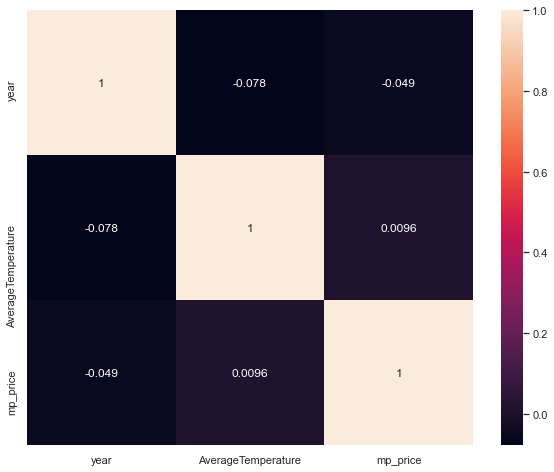

In [34]:
# correlation between variables
plt.figure(figsize=(10,8))
sns.heatmap(corr_table.corr(), annot = True)

plt.show()


In [35]:
# countries to be used in finding correlation
corr_table['Country'].unique()

array(['Afghanistan', 'Bangladesh', 'Burkina Faso', 'Colombia',
       'Ethiopia', 'Guatemala', 'Mexico', 'Mozambique', 'Nicaragua',
       'Niger', 'Peru', 'Philippines', 'Rwanda', 'Senegal', 'Somalia',
       'South Africa', 'Thailand', 'Nepal', 'Sudan', 'Togo', 'Benin',
       'Nigeria', 'Tajikistan', 'Burundi', 'Cambodia', 'Chad', 'Malawi',
       'Mali', 'Mauritania', 'Zambia', 'Central African Republic',
       'Madagascar', 'Pakistan', 'Sri Lanka', 'Swaziland', 'Argentina',
       'Cameroon', 'Djibouti', 'Ecuador', 'El Salvador', 'Haiti',
       'Kazakhstan', 'Kyrgyzstan', 'Bhutan', 'Cape Verde',
       'Dominican Republic', 'Gambia', 'Ghana', 'Kenya', 'Liberia',
       'Panama', 'Uganda', 'Azerbaijan', 'Costa Rica', 'Eritrea', 'Gabon',
       'Georgia', 'Honduras', 'Indonesia', 'Mongolia', 'Angola',
       'Bolivia', 'Guinea', 'Belarus', 'Yemen', 'Egypt', 'Lesotho',
       'Namibia', 'Paraguay', 'Zimbabwe', 'Armenia', 'Congo', 'Japan',
       'Jordan', 'Iraq', 'Lebanon', 'Sierr

In [36]:
corr_table['Country'].value_counts()

Mozambique      14
Colombia        14
Ethiopia        14
Niger           14
Mexico          14
                ..
Congo            3
Lebanon          2
Sierra Leone     2
Iraq             2
Turkey           1
Name: Country, Length: 78, dtype: int64

Quick check on correlation between land temperature and food prices in different countries.

In [37]:
Nig= corr_table[corr_table['Country']=='Nigeria']

In [38]:

from scipy.stats import pearsonr
x=np.array(Nig['AverageTemperature'])
y=np.array(Nig['mp_price'])
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.181


In [39]:
pak= corr_table[corr_table['Country']=='Pakistan']

In [40]:
x=np.array(pak['AverageTemperature'])
y=np.array(pak['mp_price'])
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.426


In [41]:
col= corr_table[corr_table['Country']=='Colombia']
x=np.array(col['AverageTemperature'])
y=np.array(col['mp_price'])
corr, _ = pearsonr(x, y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.055


In [42]:
# Checking correlation between land Temperature and food prices for the different countries
s=corr_table['Country'].unique()
all_corr = np.zeros(len(s))

year_num = np.zeros(len(s))

for i in range(len(s)):
    
    
    j=corr_table[corr_table['Country']==s[i]]
    if (len(j)>=2):
        x=np.array(j['AverageTemperature'])
        y=np.array(j['mp_price'])
        all_corr[i], _ = pearsonr(x, y)
        year_num[i] = len(j)
    else:
        all_corr[i] = np.nan
        year_num[i] = len(j)
# making sure there is atleast two data enties for correlation in each country
    
    

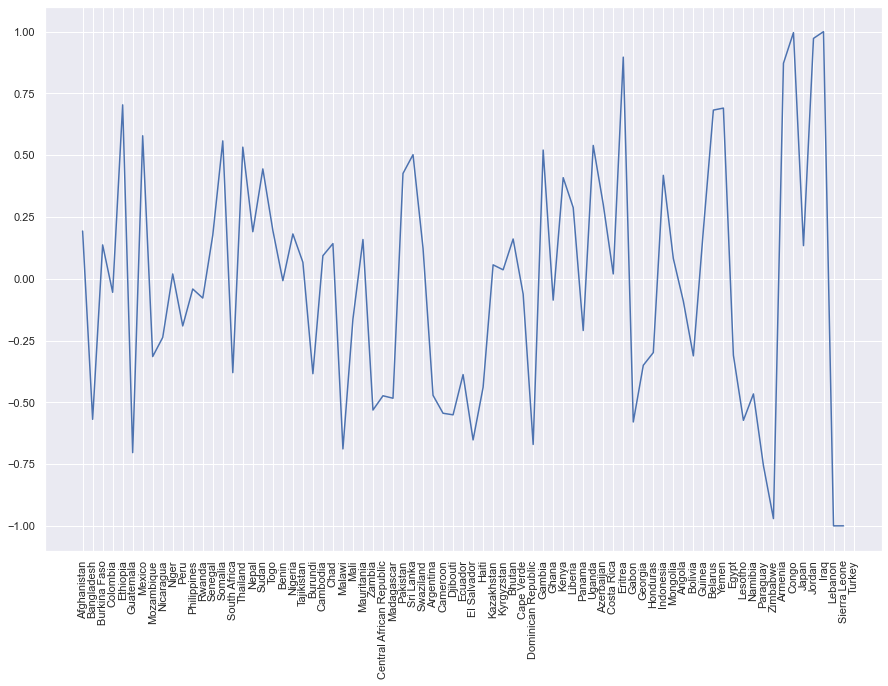

In [56]:
# A graphic representation of correlation across countries
plt.plot(s, all_corr)
plt.xticks(rotation=90)
plt.show()

In [44]:
# correlation values
all_corr

array([ 0.19308167, -0.56893135,  0.13702663, -0.05490412,  0.70380983,
       -0.7036885 ,  0.57871655, -0.31492886, -0.23751712,  0.01940909,
       -0.19103345, -0.04144782, -0.07815868,  0.17649435,  0.55798172,
       -0.3800148 ,  0.5326594 ,  0.19029342,  0.44454479,  0.19555791,
       -0.00780738,  0.18138033,  0.06665324, -0.38429178,  0.09326745,
        0.14223215, -0.6886763 , -0.16295453,  0.15881134, -0.53139275,
       -0.47357771, -0.48355071,  0.42621183,  0.50209634,  0.12388128,
       -0.47187821, -0.54436682, -0.55070741, -0.38780657, -0.6522739 ,
       -0.43936938,  0.05630256,  0.03620994,  0.16092365, -0.061798  ,
       -0.6706456 ,  0.52088199, -0.08651036,  0.40911865,  0.28809561,
       -0.20949568,  0.53955395,  0.30097334,  0.01951933,  0.89688893,
       -0.57965084, -0.35023586, -0.29875768,  0.41858643,  0.08184511,
       -0.09075407, -0.3121007 ,  0.1974383 ,  0.6825899 ,  0.69064623,
       -0.30956482, -0.57307555, -0.46614034, -0.75635762, -0.97

In [45]:
# number of years available in the data in determining correlation btw land temperature and food price for each country.
year_num

array([14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 13., 13., 13., 11., 12., 12., 11., 11., 11.,
       11., 11., 11., 11., 10., 10., 10., 10., 10.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        4.,  7.,  3.,  7.,  5.,  7.,  7.,  7.,  6.,  6.,  6.,  5.,  5.,
        4.,  4.,  4.,  4.,  4.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  1.])

In [46]:
pos= abs(all_corr)>=0.5
pos

array([False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False,  True, False, False,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False])

In [47]:
# countries with moderate to strong correlation between their land temperature and their food prices
s[pos==True]

array(['Bangladesh', 'Ethiopia', 'Guatemala', 'Mexico', 'Somalia',
       'Thailand', 'Malawi', 'Zambia', 'Sri Lanka', 'Cameroon',
       'Djibouti', 'El Salvador', 'Dominican Republic', 'Gambia',
       'Uganda', 'Eritrea', 'Gabon', 'Belarus', 'Yemen', 'Lesotho',
       'Paraguay', 'Zimbabwe', 'Armenia', 'Congo', 'Jordan', 'Iraq',
       'Lebanon', 'Sierra Leone'], dtype=object)

In [48]:
len(s[pos==True])

28

Of the 78 countries used, 28 had moderate to strong correlation between their Land Temperature and Food Prices.
~25% of countries.